## Final Model and Conclusions

In [31]:
import pandas as pd

In [2]:
X_train = pd.read_feather('X_train_selected')
y_train = pd.read_feather('with_dates_y_train')
y_train = y_train.drop(columns = 'index')

In [4]:
X_test = pd.read_feather('with_dates_X_test')
y_test = pd.read_feather('with_dates_y_test')
X_test = X_test.drop(columns = 'index')
y_test = y_test.drop(columns = 'index')

In [8]:
X_test = X_test[X_train.columns.tolist()]

In [10]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 21, max_features='auto', min_samples_leaf=5, random_state = 35)
rfr = rfr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
rfr.score(X_test, y_test)

0.5779960138149672

In [13]:
import eli5
from eli5.sklearn import PermutationImportance
pmi = PermutationImportance(rfr).fit(X_test, y_test)

In [16]:
eli5.explain_weights_df(pmi, feature_names = X_test.columns.to_list())

,feature,weight,std
0,OK_ratings,0.177761,0.015367
1,Fascinating_ratings,0.158236,0.014718
2,Informative_ratings,0.096992,0.002715
3,Inspiring_ratings,0.049561,0.002888
4,languages,0.033636,0.002491
5,Funny_ratings,0.022731,0.004843


The final score of my model on my test data was ~0.58. <br>
This means that 58% of the variation in the data can be explained by my random forest. <br>
The model had a higher score on the validation set, but performed worse on data that it had never been exposed to. <br>
It is possible that this is due to some collinearity in the model, as I decided to keep both the Fascinating_ratings and Informative_ratings features even though they had a spearman correlation of greater than 0.6. <br>

The OK_ratings feature is the feature with the most weight in the model (when scored on the holdout set) with a weight of about 0.18. <br>
All features have a weight of greater than 0.1, with the lowest weighted feature being Funny_ratings with a weight of 0.02. <br>
This is helpful because it tells speakers that the most important things about their Ted Talks are how many people rate it as OK, Fascinating, Informative, Inspiring, and Funny. <br> When putting together their content, speakers should aim to be all 5 of these things. <br> They should also push to have their Ted Talk translated into as many languages as possible, which leads to more views on their talk. <br>

In [19]:
estimator = rfr.estimators_[0]

In [20]:
estimator

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1967331017, splitter='best')

In [28]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_test.columns,
                class_names = y_test.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True, max_depth = 3)

In [29]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

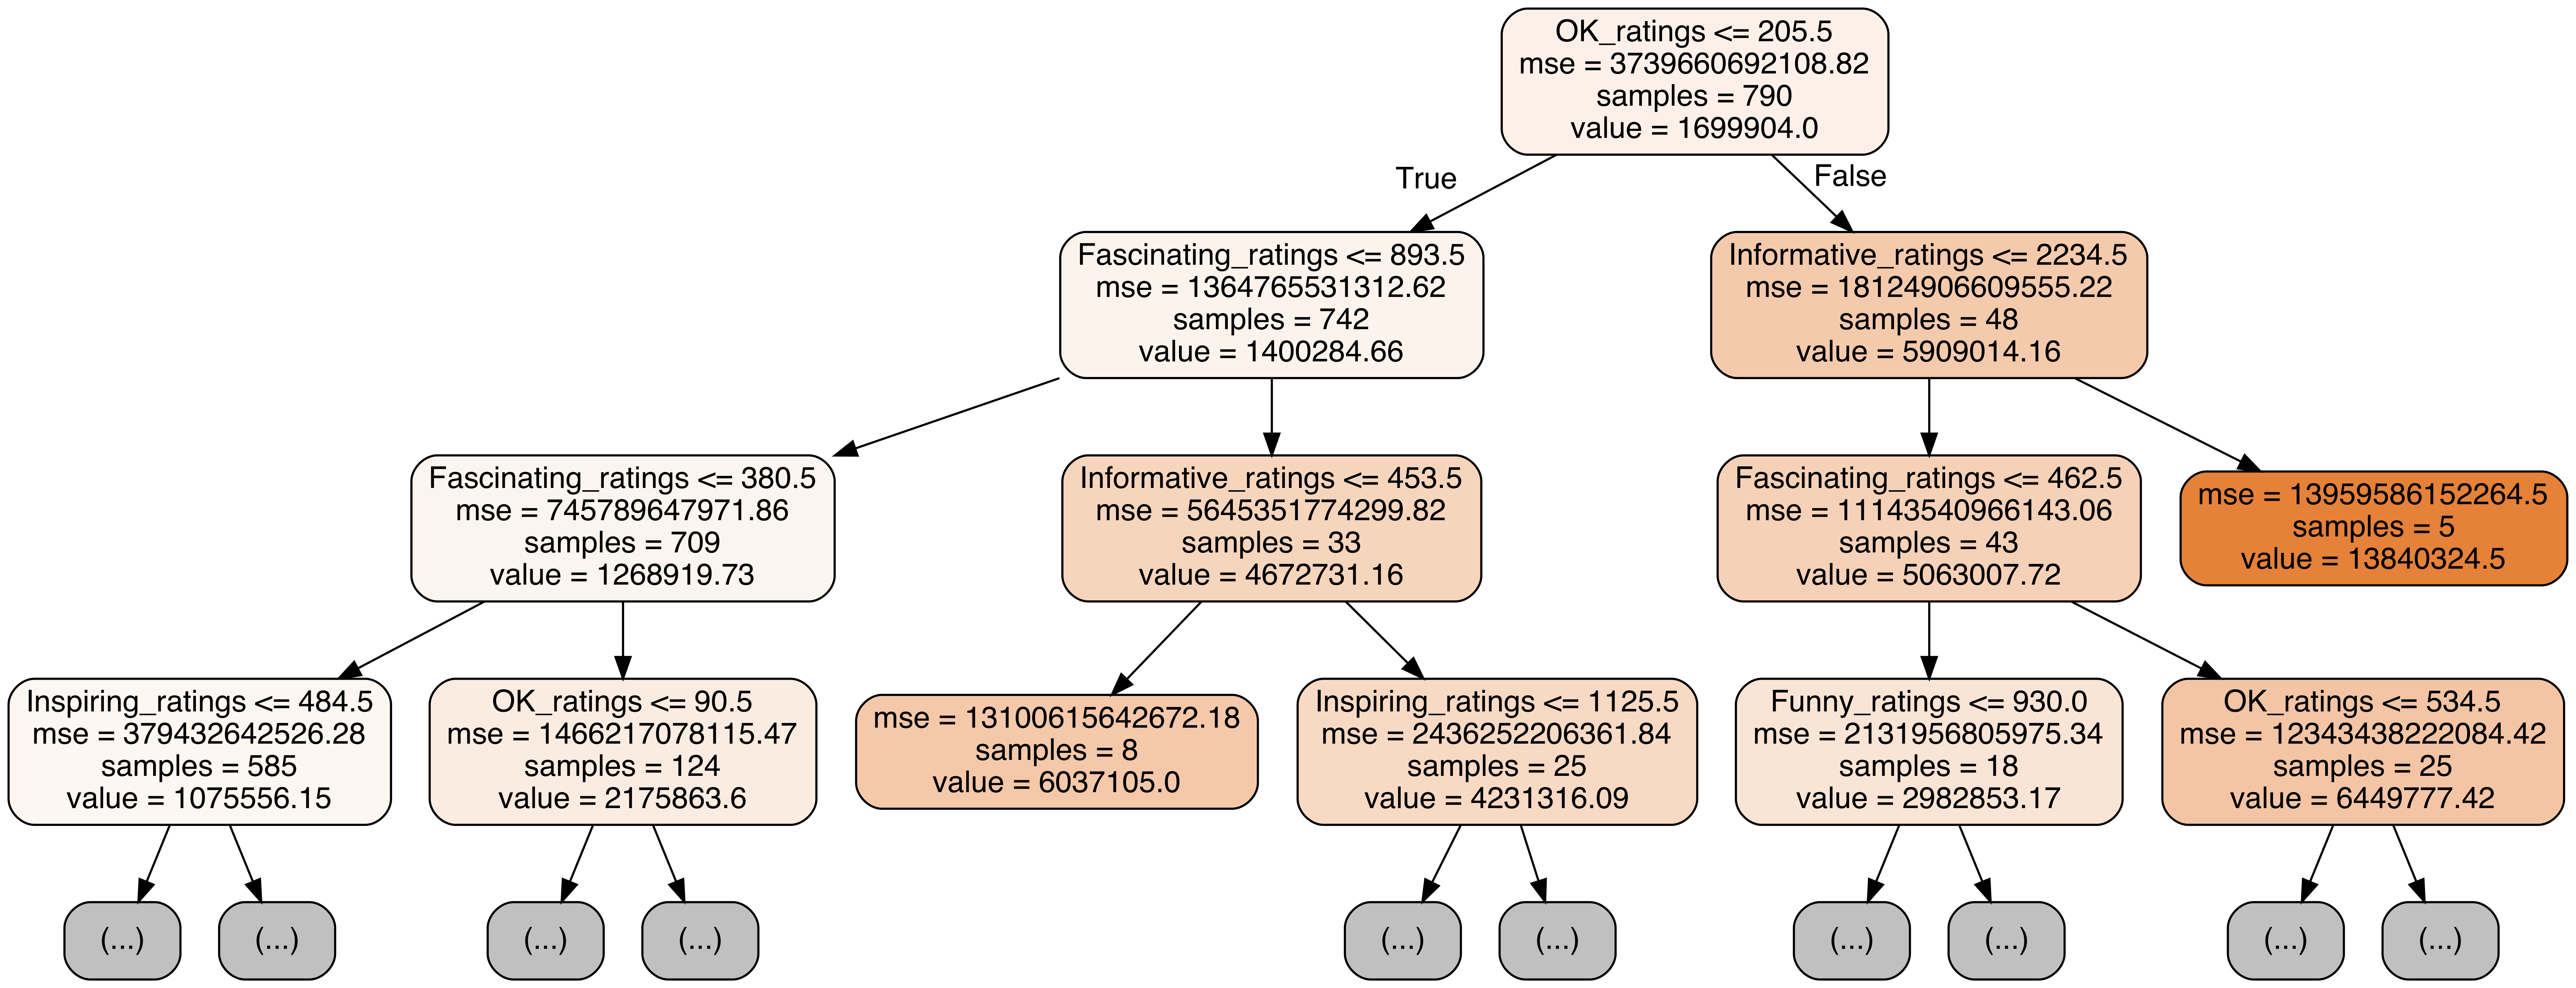

In [30]:
from IPython.display import Image
Image(filename = 'tree.png')

This chart helps to visualize the first tree in the Random Forest up to a depth of 3. <br>
We see that the root node is OK_ratings <= 205.5 (this is somewhat interesting because OK_ratings is our most important feature). <br>
There is only 1 leaf node in the first 3 levels, and it is OK_ratings >=205.5 -> Informative_ratings >= 2234.5. <br>

## Linear Regression Model vs. Random Forest Model

In my previous project with the [Ted Talk Dataset](https://github.com/ngb0330/Projects/blob/master/Analyses/Ted%20Talk%20Analysis/Ted%20Talk%20Feature%20Selection.ipynb), I built a linear regression model that had an R-squared score of 0.86 on my test data. <br> 
That model included 5 features: Funny_ratings, Courageous_ratings, Informative_ratings, Fascinating_ratings, and OK_ratings. <br>
Four of those features also appear in my random forest model, but Courageous_ratings does not.<br>
It is possible that this is because the Ted Talk data has more noise in it, which linear regression is better able to handle than random forests. <br>
This is because the random forest is limited in the amount of splits it can make by the hyperparameters that I decided on in the first part of this project. <br>
Due to its higher R-squared score, and because it is easier to understand (as more people have learned about lines than trees), I would choose to present the linear regression model as the representation of the data. 